In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import glob
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
# generators
from tensorflow import keras
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Forest/Training',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(196,196)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Forest/Testing',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(196,196)
)

Found 1520 files belonging to 2 classes.
Found 380 files belonging to 2 classes.


In [5]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
from keras.layers import Dropout
model = Sequential()

model.add(Conv2D(128,(3,3),input_shape = (196,196,3),padding='same', activation='relu'))
model.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation= "sigmoid"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 98, 98, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 98, 98, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 98, 98, 64)        36928     
                                                        

In [8]:
callbacks = [EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)]
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(train_ds,validation_data=validation_ds,epochs = 5,batch_size = 32,callbacks = callbacks)

Epoch 1/5
48/48 [==============================] - 2123s 44s/step - loss: 0.4568 - accuracy: 0.8053 - val_loss: 0.3395 - val_accuracy: 0.8553
Epoch 2/5
48/48 [==============================] - 1996s 42s/step - loss: 0.2345 - accuracy: 0.9217 - val_loss: 0.1998 - val_accuracy: 0.9289
Epoch 3/5
48/48 [==============================] - 2000s 42s/step - loss: 0.1766 - accuracy: 0.9474 - val_loss: 0.1710 - val_accuracy: 0.9526
Epoch 4/5
48/48 [==============================] - 1929s 40s/step - loss: 0.1434 - accuracy: 0.9592 - val_loss: 0.1890 - val_accuracy: 0.9368
Epoch 5/5
48/48 [==============================] - 1926s 40s/step - loss: 0.1611 - accuracy: 0.9487 - val_loss: 0.1842 - val_accuracy: 0.9447


In [9]:
model.save('/content/drive/MyDrive/Forest/model2.h5')

In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [18]:
image_for_testing=r'/content/drive/MyDrive/Forest/Testing/fire/fire_0002.jpg'

In [19]:
test_image=image.load_img(image_for_testing,target_size=(196,196))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)

1/1 [==============================] - 0s 274ms/step


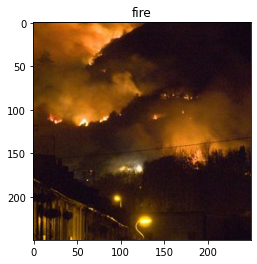

In [20]:
Catagories=['fire','nofire']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()